In [ ]:
!pip install mlxtend
!pip install imbalanced-learn
!pip install itables

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learnig_Tahlildadeh"

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/train-s7.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ID_code  target    var_0   var_1    var_2   var_3    var_4  \
0            train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607   
1            train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   
2            train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825   
3            train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846   
4            train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   
...              ...     ...      ...     ...      ...     ...      ...   
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
0       -9.2834  5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910   
1        7.0433  5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516   
2       -9.0837  6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858   
3       -1.8361  5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214   
4        2.4486  5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942   
...         ...     ...      ...  ...      ...      ...      ...      ...   
199995  11.6081  5.6709  15.1516  ...   6.1415  13.2305   3.9901   0.9388   
199996 -10.5628  5.8802  21.5940  ...   4.9611   4.6549   0.6998   1.8341   
199997  -5.4086  4.5555  21.5571  ...   4.0651   5.4414   3.1032   4.8793   
199998   0.5339  6.0479  17.0152  ...   2.6840   8.6587   2.7337  11.1178   
199999   0.3488  5.2839  15.2058  ...   8.9842   1.6893   0.1276   0.3766   

        var_194  var_195  var_196  var_197  var_198  var_199  
0       18.5227  -2.3978   7.8784   8.5635  12.7803  -1.0914  
1       15.4305   2.0339   8.1267   8.7889  18.3560   1.9518  
2       21.6042   3.1417  -6.5213   8.2675  14.7222   0.3965  
3       23.0347  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
4       13.2876  -1.5121   3.9267   9.5031  17.9974  -8.8104  
...         ...      ...      ...      ...      ...      ...  
199995  18.0249  -1.7939   2.1661   8.5326  16.6660 -17.8661  
199996  22.2717   1.7337  -2.1651   6.7419  15.9054   0.3388  
199997  23.5311  -1.5736   1.2832   8.7155  13.8329   4.1995  
199998  20.4158  -0.0786   6.7980  10.0342  15.5289 -13.9001  
199999  15.2101  -2.4907  -2.2342   8.1857  12.1284   0.1385  

[200000 rows x 202 columns]

In [ ]:
df['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [ ]:
df.shape

(200000, 202)

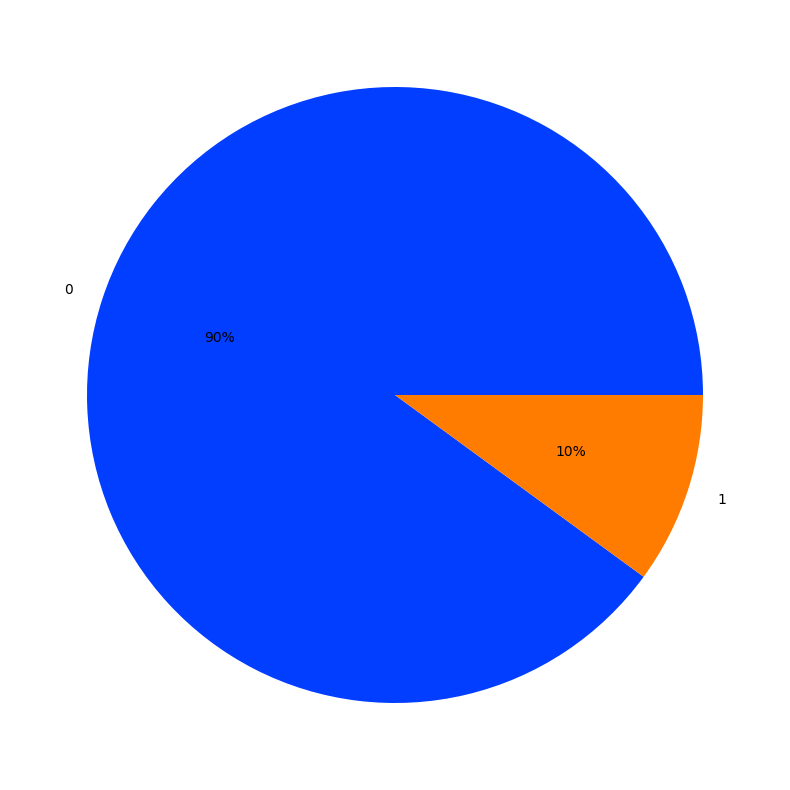

In [ ]:
data = df['target'].value_counts().values
keys = df['target'].value_counts().index

plt.figure(figsize = (10,10))
palette_color = sns.color_palette('bright')
plt.pie(data, labels = keys, colors = palette_color, autopct= '%.0f%%')
plt.show()

In [ ]:
x = df.iloc[:,2:]
y = df.iloc[:,1]

In [ ]:
x.shape, y.shape

((200000, 200), (200000,))

In [ ]:
x

var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
...         ...     ...      ...     ...      ...      ...     ...      ...   
199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709  15.1516   
199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802  21.5940   
199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555  21.5571   
199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479  17.0152   
199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839  15.2058   

         var_8   var_9  ...  var_190  var_191  var_192  var_193  var_194  \
0      -4.9200  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227   
1       3.1468  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   
2      -4.9193  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   
3      -5.8609  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347   
4       6.2654  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876   
...        ...     ...  ...      ...      ...      ...      ...      ...   
199995 -0.6209  5.6669  ...   6.1415  13.2305   3.9901   0.9388  18.0249   
199996 -3.6797  6.0019  ...   4.9611   4.6549   0.6998   1.8341  22.2717   
199997  0.1202  6.1629  ...   4.0651   5.4414   3.1032   4.8793  23.5311   
199998 -2.1926  8.7542  ...   2.6840   8.6587   2.7337  11.1178  20.4158   
199999 -0.4541  9.3688  ...   8.9842   1.6893   0.1276   0.3766  15.2101   

        var_195  var_196  var_197  var_198  var_199  
0       -2.3978   7.8784   8.5635  12.7803  -1.0914  
1        2.0339   8.1267   8.7889  18.3560   1.9518  
2        3.1417  -6.5213   8.2675  14.7222   0.3965  
3       -1.2706  -2.9275  10.2922  17.9697  -8.9996  
4       -1.5121   3.9267   9.5031  17.9974  -8.8104  
...         ...      ...      ...      ...      ...  
199995  -1.7939   2.1661   8.5326  16.6660 -17.8661  
199996   1.7337  -2.1651   6.7419  15.9054   0.3388  
199997  -1.5736   1.2832   8.7155  13.8329   4.1995  
199998  -0.0786   6.7980  10.0342  15.5289 -13.9001  
199999  -2.4907  -2.2342   8.1857  12.1284   0.1385  

[200000 rows x 200 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()    # Normalization
minmax.fit(x)
x = minmax.transform(x)

In [ ]:
y.shape

(200000,)

In [ ]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

# Desired size for each class after undersampling
desired_size_per_class = len(y) // 2

# Apply Random Undersampling to reduce the dataset size to the desired number of samples
undersample = RandomUnderSampler(sampling_strategy={0: desired_size_per_class, 1: desired_size_per_class}, random_state=42)
x_resampled, y_resampled = undersample.fit_resample(x_smote, y_smote)

# Check the size of the resampled dataset
print(f"Original dataset size: {x.shape}")
print(f"Resampled dataset size: {x_resampled.shape}")

Original dataset size: (200000, 200)
Resampled dataset size: (200000, 200)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
y_train.shape, x_train.shape

((160000,), (160000, 200))

In [ ]:
y_train.value_counts()

target
0    80000
1    80000
Name: count, dtype: int64

In [ ]:
# Define evaluation metrics function
def clf_score(y_pred, y_true, data_segment):
    print(f'Scores for {data_segment} data')
    print('**********************************')
    scores = {
       'accuracy_score' : accuracy_score(y_true, y_pred),
       'recall_score': recall_score(y_true, y_pred),
       'precision_score': precision_score(y_true, y_pred),
       'f1_score': f1_score(y_true, y_pred)
    }
    return scores

In [ ]:
lr = LogisticRegression(random_state=42, n_jobs=-1)
lr.fit(x_train, y_train)
y_pred_train_lr = lr.predict(x_train)
pprint(clf_score(y_pred_train_lr, y_train, 'Train'))

y_pred_test_lr = lr.predict(x_test)
pprint(clf_score(y_pred_test_lr, y_test, 'Test'))

Scores for Train data
**********************************
{'accuracy_score': 0.80111875,
 'f1_score': 0.8030842156723207,
 'precision_score': 0.7952253146561761,
 'recall_score': 0.8111}
Scores for Test data
**********************************
{'accuracy_score': 0.80065,
 'f1_score': 0.8025357832697737,
 'precision_score': 0.7950152094985772,
 'recall_score': 0.8102}


In [ ]:
ppn = Perceptron(random_state=42)
ppn.fit(x_train, y_train)
y_pred_train_ppn = ppn.predict(x_train)
pprint(clf_score(y_pred_train_ppn, y_train, 'Train'))

y_pred_test_ppn = ppn.predict(x_test)
pprint(clf_score(y_pred_test_ppn, y_test, 'Test'))

Scores for Train data
**********************************
{'accuracy_score': 0.772975,
 'f1_score': 0.7478830617174269,
 'precision_score': 0.8408140333354142,
 'recall_score': 0.67345}
Scores for Test data
**********************************
{'accuracy_score': 0.772475,
 'f1_score': 0.7469624933967248,
 'precision_score': 0.841297676457694,
 'recall_score': 0.67165}


In [ ]:
dt = DecisionTreeClassifier( random_state = 42)
dt.fit(x_train,y_train)
y_pred_train_dt = dt.predict(x_train)
pprint(clf_score(y_pred_train_dt, y_train, 'Train'))

y_pred_test_dt = dt.predict(x_test)
pprint(clf_score(y_pred_test_dt, y_test, 'Test'))

Scores for Train data
**********************************
{'accuracy_score': 1.0,
 'f1_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0}
Scores for Test data
**********************************
{'accuracy_score': 0.7388,
 'f1_score': 0.7491115166650658,
 'precision_score': 0.7206616152282388,
 'recall_score': 0.7799}


In [ ]:
svm = SVC(kernel='rbf',random_state=42)
svm.fit(x_train,y_train)
y_pred_train_svm = svm.predict(x_train)
pprint(clf_score(y_pred_train_svm, y_train, 'Train'))

y_pred_test_svm = svm.predict(x_test)
pprint(clf_score(y_pred_test_svm, y_test, 'Test'))

Scores for Train data
**********************************
{'accuracy_score': 0.97055625,
 'f1_score': 0.9702357259740835,
 'precision_score': 0.9809139338503009,
 'recall_score': 0.9597875}
Scores for Test data
**********************************
{'accuracy_score': 0.92545,
 'f1_score': 0.9243876464323748,
 'precision_score': 0.9377507974071406,
 'recall_score': 0.9114}
